Epoch 100/1000, Loss: 0.0449
Epoch 200/1000, Loss: 0.0240
Epoch 300/1000, Loss: 0.0114
Epoch 400/1000, Loss: 0.0044
Epoch 500/1000, Loss: 0.0018
Epoch 600/1000, Loss: 0.0010
Epoch 700/1000, Loss: 0.0007
Epoch 800/1000, Loss: 0.0004
Epoch 900/1000, Loss: 0.0003
Epoch 1000/1000, Loss: 0.0002


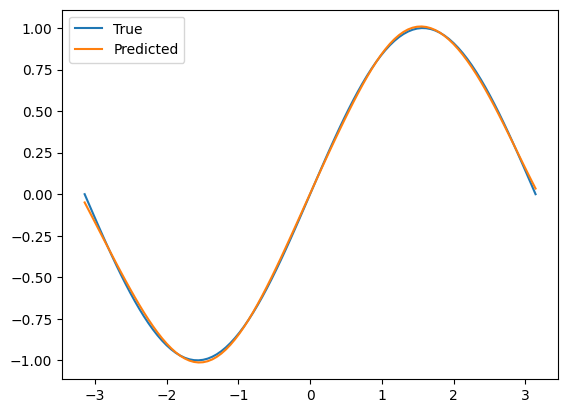

In [ ]:
# 导入必要的库
import torch               # PyTorch 核心库
import torch.nn as nn      # 神经网络模块
import torch.optim as optim  # 优化器模块
import matplotlib.pyplot as plt  # 绘图库
import numpy as np         # 数值计算库

# ================================
# 1. 准备训练数据
# ================================
# 生成 -π 到 π 的 100 个点
x = np.linspace(-np.pi, np.pi, 100, dtype=np.float32)
# 计算正弦值
y = np.sin(x)

# 转换为 PyTorch 张量，并把形状从 (100,) 变为 (100,1)
# unsqueeze(1) 是为了增加一个维度，使数据符合神经网络输入要求
x_tensor = torch.from_numpy(x).unsqueeze(1)  # shape: (100,1)
y_tensor = torch.from_numpy(y).unsqueeze(1)  # shape: (100,1)

# ================================
# 2. 定义神经网络模型
# ================================
class SimpleBP(nn.Module):
    def __init__(self):
        super(SimpleBP, self).__init__()
        # 定义隐藏层: 输入1个特征，输出10个神经元
        self.hidden = nn.Linear(1, 10)
        # 定义输出层: 输入10个特征，输出1个结果
        self.output = nn.Linear(10, 1)
        # 激活函数: Tanh 将数据映射到 -1~1
        self.activation = nn.Tanh()

    def forward(self, x):
        # 前向传播过程
        x = self.activation(self.hidden(x))  # 隐藏层 + 激活函数
        x = self.output(x)                   # 输出层
        return x

# 创建网络实例
net = SimpleBP()

# ================================
# 3. 定义损失函数和优化器
# ================================
criterion = nn.MSELoss()               # 均方误差损失函数
optimizer = optim.Adam(net.parameters(), lr=0.01)  # Adam优化器，学习率0.01

# ================================
# 4. 训练神经网络
# ================================
epochs = 1000  # 训练轮数

for epoch in range(epochs):
    optimizer.zero_grad()           # 清空梯度
    y_pred = net(x_tensor)          # 前向传播，得到预测值
    loss = criterion(y_pred, y_tensor)  # 计算损失
    loss.backward()                 # 反向传播，计算梯度
    optimizer.step()                # 更新参数

    # 每100轮打印一次损失
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# ================================
# 5. 绘制结果
# ================================
with torch.no_grad():  # 不需要计算梯度，节省内存
    y_pred = net(x_tensor).numpy()  # 将预测值转换为 numpy 数组

# 绘制真实值和预测值曲线
plt.plot(x, y, label='True')       # 真实曲线
plt.plot(x, y_pred, label='Predicted')  # 预测曲线
plt.legend()                       # 显示图例
plt.show()                          # 展示图像